In [ ]:
%cd drive/My\ Drive/ML/Parkinsons

/content/drive/My Drive/ML/Parkinsons


In [ ]:
import numpy as np
import matplotlib as mlt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score, confusion_matrix,matthews_corrcoef

In [ ]:
data = pd.read_csv('train_data.txt', sep=",", header=None)
data.columns = ["Subject id", "Jitter (local)" ,"Jitter (local, absolute)" ,"Jitter (rap)" ,"Jitter (ppq5)", "Jitter (ddp)", "Shimmer (local)", "Shimmer (local, dB)" ,"Shimmer (apq3)", "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)", "AC" ,"NTH" ,"HTN", "Median pitch", "Mean pitch", "Standard deviation", "Minimum pitch", "Maximum pitch", "Number of pulses", "Number of periods", "Mean period", "Standard deviation of period", "Fraction of locally unvoiced frames", "Number of voice breaks", "Degree of voice breaks", "UPDRS", "class information"]
data.shape

(1040, 29)

In [ ]:
y_updrs = data.UPDRS # for regression
y_class_info = data["class information"]#for classification
data_x = data.drop(labels=['UPDRS', "Subject id", "class information"], axis=1, inplace = False)
print(data_x.shape, y_updrs.shape, y_class_info.shape)

(1040, 26) (1040,) (1040,)


In [ ]:
total_folds = 10
kfold = KFold(n_splits= total_folds, shuffle=True, random_state=40)

acc_per_fold = []
fold=0

for train_index, test_index in kfold.split(data_x, y_class_info):
    fold+=1
    X_train, X_test, y_train, y_test =  data_x.iloc[train_index], data_x.iloc[test_index], y_class_info.iloc[train_index], y_class_info.iloc[test_index]

    clf = RandomForestClassifier(min_samples_split=2, 
                             bootstrap= True,
                             oob_score = True,  
                             random_state=0,
                             min_samples_leaf= 1,
                             n_estimators = 400,
                             max_depth= 70)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    print("\nFold : ",fold,"\n")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print("Average Accuracy : " ,(tp+tn)/(tp+tn+fp+fn))
    print("Sensitivity: ",(tp)/(tp+fn))
    print("Specificity: ",(tn)/(tn+fp))
    print("MCC: ",matthews_corrcoef(y_test, y_pred))
    print(clf.score(X_test, y_test))

    acc_per_fold.append(clf.score(X_test, y_test))

for i in range(total_folds):
    print("Fold ", i, "accuracy", acc_per_fold[i])

print("\nMean Accuracy = ",np.mean(acc_per_fold),'(+/-',np.std(acc_per_fold),')');


Fold :  1 

Average Accuracy :  0.75
Sensitivity:  0.7321428571428571
Specificity:  0.7708333333333334
MCC:  0.5014858873767987
0.75

Fold :  2 

Average Accuracy :  0.6634615384615384
Sensitivity:  0.7222222222222222
Specificity:  0.6
MCC:  0.3249414453021936
0.6634615384615384

Fold :  3 

Average Accuracy :  0.6634615384615384
Sensitivity:  0.6862745098039216
Specificity:  0.6415094339622641
MCC:  0.32796599540130766
0.6634615384615384

Fold :  4 

Average Accuracy :  0.7211538461538461
Sensitivity:  0.7924528301886793
Specificity:  0.6470588235294118
MCC:  0.44472490842445617
0.7211538461538461

Fold :  5 

Average Accuracy :  0.7307692307692307
Sensitivity:  0.7719298245614035
Specificity:  0.6808510638297872
MCC:  0.4548227516841419
0.7307692307692307

Fold :  6 

Average Accuracy :  0.6923076923076923
Sensitivity:  0.660377358490566
Specificity:  0.7254901960784313
MCC:  0.38643984639933865
0.6923076923076923

Fold :  7 

Average Accuracy :  0.6634615384615384
Sensitivity:  0.6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, y_class_info, test_size = 0.20, random_state = 42)
clf_final = RandomForestClassifier(min_samples_split=2, 
                             bootstrap= True,
                             oob_score = True,  
                             random_state=0,
                             min_samples_leaf= 1,
                             n_estimators = 400,
                             max_depth= 70)

clf_final.fit(X_train, y_train)

y_pred = clf_final.predict(X_test)
y_score = clf_final.predict_proba(X_test)[:,1]

print(clf_final.score(X_test, y_test))
print("Accuracy Score = ",accuracy_score(y_test, y_pred, normalize=True))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Average Accuracy : " ,(tp+tn)/(tp+tn+fp+fn))
print("Sensitivity: ",(tp)/(tp+fn))
print("Specificity: ",(tn)/(tn+fp))
print("MCC: ",matthews_corrcoef(y_test, y_pred))
print("F-Measure : ", f1_score(y_test, y_pred))
print("Confusion Matrix = ",confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))

0.7163461538461539
Accuracy Score =  0.7163461538461539
Average Accuracy :  0.7163461538461539
Sensitivity:  0.7941176470588235
Specificity:  0.6415094339622641
MCC:  0.44014868085732156
F-Measure :  0.7330316742081447
Confusion Matrix =  [[68 38]
 [21 81]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


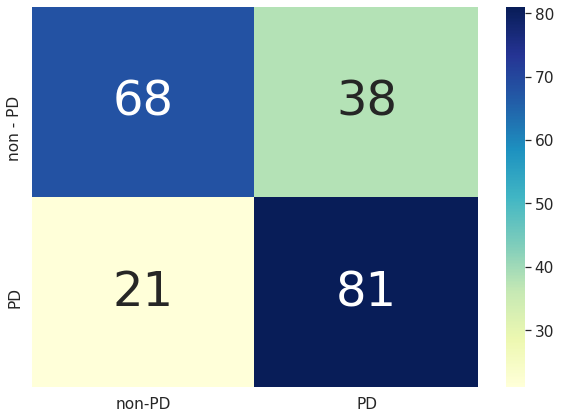

In [ ]:
import seaborn as sn

array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in ["non - PD", "PD"]],
                  columns = [i for i in ["non-PD","PD"]])
accuracy_thr = accuracy_score(y_test, y_pred)

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm,cmap="YlGnBu",annot=True,annot_kws={"fontsize":48})
plt.savefig("RF_Conf_orig_matrix.png", bbox_inches = "tight")

In [ ]:
X_test.iloc[1].reshape(1,-1).shape

In [ ]:
interpretation = pd.DataFrame({'Variable':data_x.columns,   'Importance':clf_final.feature_importances_}).sort_values('Importance', ascending=False)
interpretation

,Variable,Importance
18,Maximum pitch,0.054847
16,Standard deviation,0.054054
9,Shimmer (apq11),0.051845
23,Fraction of locally unvoiced frames,0.045056
14,Median pitch,0.044240
4,Jitter (ddp),0.042611
2,Jitter (rap),0.042438
13,HTN,0.041792
1,"Jitter (local, absolute)",0.041175
3,Jitter (ppq5),0.040806


In [ ]:
sum(interpretation['Importance'].to_list())

1.0000000000000002

In [ ]:
features = data_x.columns.tolist()
features

['Jitter (local)',
 'Jitter (local, absolute)',
 'Jitter (rap)',
 'Jitter (ppq5)',
 'Jitter (ddp)',
 'Shimmer (local)',
 'Shimmer (local, dB)',
 'Shimmer (apq3)',
 'Shimmer (apq5)',
 'Shimmer (apq11)',
 'Shimmer (dda)',
 'AC',
 'NTH',
 'HTN',
 'Median pitch',
 'Mean pitch',
 'Standard deviation',
 'Minimum pitch',
 'Maximum pitch',
 'Number of pulses',
 'Number of periods',
 'Mean period',
 'Standard deviation of period',
 'Fraction of locally unvoiced frames',
 'Number of voice breaks',
 'Degree of voice breaks']

In [ ]:
importance = clf_final.feature_importances_

for i,v in zip(features, importance):
	print('%s, Score: %.5f' % (i,v))

Jitter (local), Score: 0.03435
Jitter (local, absolute), Score: 0.04118
Jitter (rap), Score: 0.04244
Jitter (ppq5), Score: 0.04081
Jitter (ddp), Score: 0.04261
Shimmer (local), Score: 0.03832
Shimmer (local, dB), Score: 0.03904
Shimmer (apq3), Score: 0.03202
Shimmer (apq5), Score: 0.03887
Shimmer (apq11), Score: 0.05185
Shimmer (dda), Score: 0.03227
AC, Score: 0.03996
NTH, Score: 0.03521
HTN, Score: 0.04179
Median pitch, Score: 0.04424
Mean pitch, Score: 0.03747
Standard deviation, Score: 0.05405
Minimum pitch, Score: 0.03549
Maximum pitch, Score: 0.05485
Number of pulses, Score: 0.03132
Number of periods, Score: 0.03144
Mean period, Score: 0.03782
Standard deviation of period, Score: 0.03718
Fraction of locally unvoiced frames, Score: 0.04506
Number of voice breaks, Score: 0.01040
Degree of voice breaks, Score: 0.02999


In [ ]:
print(len(y_test), len(y_pred), len(y_score))

208 208 208


In [ ]:
import pandas as pd
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, confusion_matrix

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
arg_g = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[arg_g], gmeans[arg_g]))
best_threshold = thresholds[arg_g] 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = accuracy_score(y_test, y_pred)
# tpr = tp/(tp+fn)
# fpr = fp/(fp+tn)
# tnr = tn/(fp+tn)
# fnr = fn/(tp+fn)

print("accuracy = ", acc, "\nroc_auc = ", roc_auc)


i=0
roc_table = pd.DataFrame(columns=["Threshold", "TPR (Sensitivity)",
                                  "FPR (Fall-out)", "Specificity",
                                  " (LR+)" ,"Youden index","Sensitivity + Specificity",
                                  "G-mean"], index=[_ for _ in range(len(thresholds))])

for fp_rate, tp_rate, thresh in zip(fpr, tpr, thresholds):
    spec = 1-fp_rate
    lrplus = tp_rate/fp_rate
    y_ind = tp_rate - fp_rate
    sen_sp = tp_rate + spec
    g_mean =  (tp_rate*spec)**(1/2)
    roc_table.iloc[i] = [thresh, tp_rate, fp_rate, spec, lrplus, y_ind, sen_sp, g_mean ]
    i+=1

Best Threshold=0.440000, G-Mean=0.732
accuracy =  0.7163461538461539 
roc_auc =  0.8020717721050684


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
%cd ../..

/content


In [ ]:
pd.set_option("display.precision", 4)
roc_table.to_csv("RF_ROC_Table.csv")
roc_table

,Threshold,TPR (Sensitivity),FPR (Fall-out),Specificity,(LR+),Youden index,Sensitivity + Specificity,G-mean
0,1.875,0,0,1,NaN,0,1,0
1,0.875,0.009804,0,1,inf,0.009804,1.01,0.09901
2,0.8375,0.03922,0,1,inf,0.03922,1.039,0.198
3,0.8275,0.05882,0,1,inf,0.05882,1.059,0.2425
4,0.785,0.1275,0,1,inf,0.1275,1.127,0.357
...,...,...,...,...,...,...,...,...
93,0.11,1,0.9151,0.08491,1.093,0.08491,1.085,0.2914
94,0.1075,1,0.934,0.06604,1.071,0.06604,1.066,0.257
95,0.0825,1,0.9528,0.04717,1.05,0.04717,1.047,0.2172
96,0.0775,1,0.9717,0.0283,1.029,0.0283,1.028,0.1682


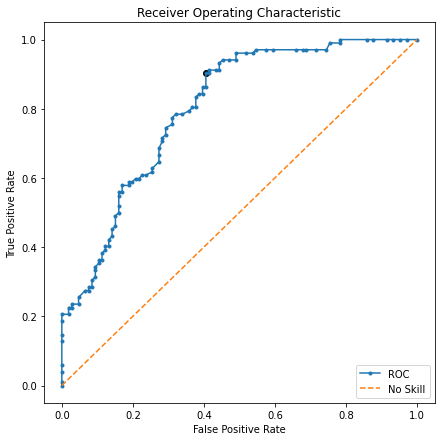

In [ ]:
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker = "." ,label = 'AUC = %0.2f' % roc_auc)
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', label = "No Skill")

plt.scatter(fpr[arg_g], tpr[arg_g], marker='o', color='black', label='Best')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(["ROC", "No Skill"], loc ="lower right")

plt.savefig("RF_ROC.jpg", bbox_inches="tight")

plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

fscore_ = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore_)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore_[ix]))

pr_table = pd.DataFrame(columns=["Threshold", "Precision",
                                  "Recall", "F-Measure"], 
                                index=[_ for _ in range(len(thresholds))])

i=0
for pre, rec, thresh in zip(precision, recall, thresholds):
    fscore = (2 * pre * rec) / (pre + rec)
    pr_table.iloc[i] = [thresh, pre, rec, fscore]
    i+=1

Best Threshold=0.420000, F-Score=0.780


In [ ]:
pr_table.to_csv("RF_PR_Table.csv")
pr_table

,Threshold,Precision,Recall,F-Measure
0,0.2325,0.5514,1,0.7108
1,0.2375,0.5489,0.9902,0.7063
2,0.2425,0.5519,0.9902,0.7088
3,0.2625,0.5549,0.9902,0.7113
4,0.265,0.558,0.9902,0.7138
...,...,...,...,...
126,0.8275,1,0.05882,0.1111
127,0.8375,1,0.03922,0.07547
128,0.84,1,0.02941,0.05714
129,0.865,1,0.01961,0.03846


No handles with labels found to put in legend.


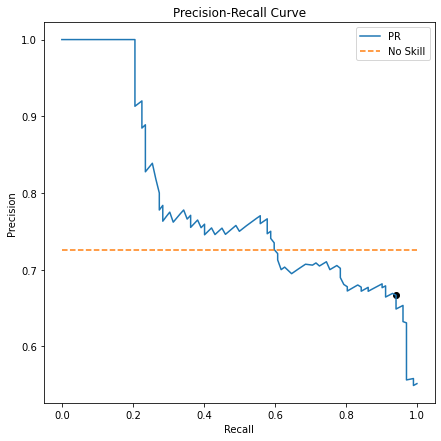

In [ ]:
plt.subplots(1, figsize=(7,7))
plt.title('Precision-Recall Curve')
plt.plot(recall, precision)
plt.plot([0, 1], [0.725, 0.725], linestyle='--')
plt.legend(loc = 'lower right')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(["PR","No Skill"], loc ="upper right")

plt.savefig("RF_PR.jpg", bbox_inches="tight")
plt.show()

In [ ]:
y_pred_thr = [ 1 if _ >= best_threshold else 0 for _ in clf_final.predict_proba(X_test)[:,1]]
print(best_threshold)
accuracy_thr = accuracy_score(y_test, y_pred_thr)
print("New accuracy ",accuracy_thr)
tn_thr, fp_thr, fn_thr, tp_thr = confusion_matrix(y_test, y_pred_thr).ravel()

print("Average Accuracy : " ,(tp_thr+tn_thr)/(tp_thr+tn_thr+fp_thr+fn_thr))
print("Sensitivity: ",(tp_thr)/(tp_thr+fn_thr))
print("Specificity: ",(tn_thr)/(tn_thr+fp_thr))
print("MCC: ",matthews_corrcoef(y_test, y_pred_thr))

0.44
New accuracy  0.7451923076923077
Average Accuracy :  0.7451923076923077
Sensitivity:  0.9019607843137255
Specificity:  0.5943396226415094
MCC:  0.5198395709010235


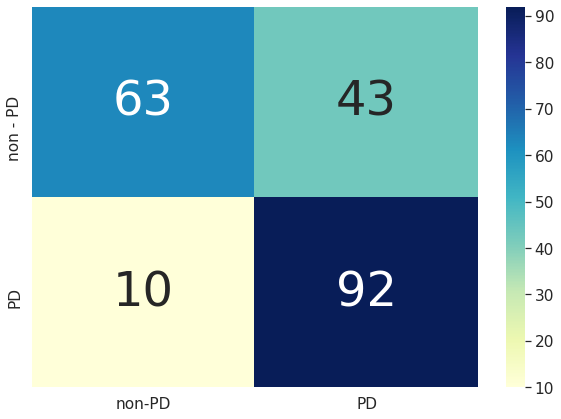

In [ ]:
import seaborn as sn

array = confusion_matrix(y_test, y_pred_thr)
df_cm = pd.DataFrame(array, index = [i for i in ["non - PD", "PD"]],
                  columns = [i for i in ["non-PD","PD"]])
accuracy_thr = accuracy_score(y_test, y_pred_thr)

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm,cmap="YlGnBu",annot=True,annot_kws={"fontsize":48})
plt.savefig("RF_Conf_matrix.png", bbox_inches = "tight")

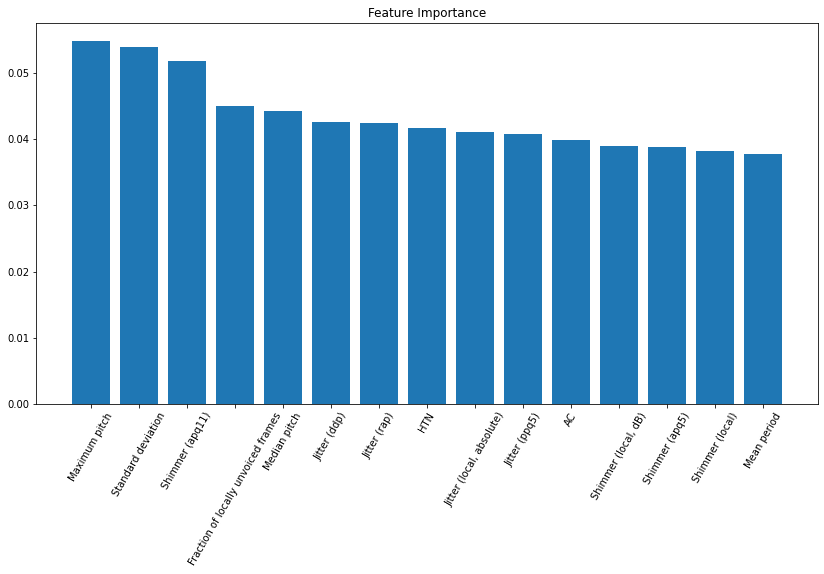

In [ ]:
# Calculate feature importances

indices = np.argsort(importance)[::-1]
indices = indices[:15]
# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Barplot: Add bars
plt.subplots(1, figsize=(14,7))
plt.bar(range(len(indices)), importance[indices])  #range(X_test.shape[1])
# Add feature names as x-axis labels
plt.xticks(range(len(indices)), names, rotation=60, fontsize = 10)   #range(X_test.shape[1]
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()